In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataSet.xlsx to DataSet.xlsx


In [ ]:
import os
os.listdir()

['.config', 'DataSet.xlsx', 'sample_data']

In [ ]:
import pandas as pd

# Cargar el archivo .xlsx
df = pd.read_excel('DataSet.xlsx')

# Verificar las primeras filas
df.head()


,Vendedor,Tipo Cliente,COD_CLIENTE_CONS,CLIE_CONS_NOMBRE,FAMILIA,COD_ARTICULO,ART_NOMBRE,Fecha.Año,Fecha.Mes,Fecha.Día,Unidad Homogénea,IMPORTE_VENDIDO_NETO,PROVINCIA,Cod_Ramo,Ramo,DIVISION,UN_NEGOCIO
0,329,FARMACIA,107262,FCIA SADER II - TRELEW,DIPIF,23301001,DIPIFEBRAL 100 ml.,2023,Enero,2,10,4878.62,CHUBUT,FCD,FARMACIA C - D,91,1
1,305,GRUPO TRESSENS,103953,TRESSENSS FCIA - SALADAS,VITAC,40101001,VITACORTIL Crema 20 gr,2023,Enero,2,10,5060.45,CORRIENTES,EYD,ESTR. Y DROG.,91,1
2,314,FARMACIA,104423,SAN PEDRO FCIA - ORAN,BIOCT,10001006,BIOCORT Gts. 5 ml,2023,Enero,6,60,23615.56,SALTA,FAB,FARMACIA A - B,1,1
3,304,FARMACIA,103689,BECCAR FCIA - BECCAR,LACRI,10001007,LACRIGESTINA LAGRIMA H.P.M.C gts x 15 ml,2023,Enero,6,24,9966.99,BUENOS AIRES,FAB,FARMACIA A - B,1,1
4,329,FARMACIA,102822,FCIA DEL PUERTO - PUNTA ALTA,NAFZX,10001008,NAFAZOLEX 0.1% Gts. 20 ml,2023,Enero,6,-30,-5825.40,BUENOS AIRES,FAB,FARMACIA A - B,1,1


In [ ]:
# Revisé información sobre el dataset, tipos de datos y valores nulos
df.info()

# Verifiqué valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245820 entries, 0 to 245819
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Vendedor              245820 non-null  int64  
 1   Tipo Cliente          245820 non-null  object 
 2   COD_CLIENTE_CONS      245820 non-null  int64  
 3   CLIE_CONS_NOMBRE      245820 non-null  object 
 4   FAMILIA               245820 non-null  object 
 5   COD_ARTICULO          245820 non-null  object 
 6   ART_NOMBRE            245820 non-null  object 
 7   Fecha.Año             245820 non-null  int64  
 8   Fecha.Mes             245820 non-null  object 
 9   Fecha.Día             245820 non-null  int64  
 10  Unidad Homogénea      245820 non-null  int64  
 11  IMPORTE_VENDIDO_NETO  245820 non-null  float64
 12  PROVINCIA             245820 non-null  object 
 13  Cod_Ramo              245820 non-null  object 
 14  Ramo                  245820 non-null  object 
 15  

,0
Vendedor,0
Tipo Cliente,0
COD_CLIENTE_CONS,0
CLIE_CONS_NOMBRE,0
FAMILIA,0
COD_ARTICULO,0
ART_NOMBRE,0
Fecha.Año,0
Fecha.Mes,0
Fecha.Día,0


# ***Exploración de datos (EDA)***

Realizaré un análisis exploratorio para entender mejor los datos y ver si hay alguna relación entre las variables.

In [ ]:
# Revisé estadísticas descriptivas para obtener una visión general de las distribuciones numéricas
df.describe()

# Verifiqué la correlación entre las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

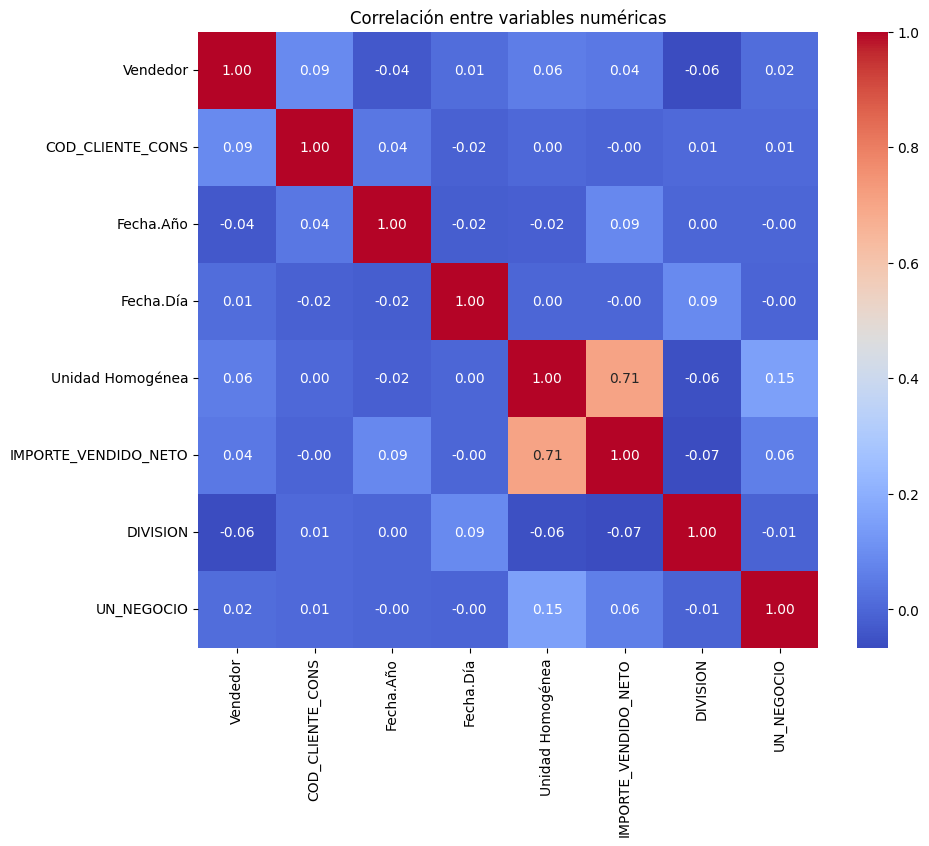

In [ ]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la correlación entre las columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()

# ***Paso 3: Feature Selection***

En este paso, elegiré las características más importantes para entrenar el modelo. Para esto, usaré un método de selección de características.

In [ ]:
# Filtrar solo las columnas numéricas para las características
X = df.select_dtypes(include=['number'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar variable objetivo si es categórica
le = LabelEncoder()
y = le.fit_transform(df['Unidad Homogénea'])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Seleccionar las 10 mejores características
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Mostrar las mejores características
selected_columns = X.columns[selector.get_support()]
print("Mejores características:", selected_columns)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Mejores características: Index(['Vendedor', 'COD_CLIENTE_CONS', 'Fecha.Año', 'Fecha.Día',
       'Unidad Homogénea', 'IMPORTE_VENDIDO_NETO', 'DIVISION', 'UN_NEGOCIO'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Opción 1: Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Realizar las predicciones
y_pred_lr = lr.predict(X_test)

# Calcular las métricas de rendimiento
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Mostrar las métricas de la regresión lineal
print(f"MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}")

MAE: 44.07585757131465, MSE: 7264.3819375509, R2: 0.5647809729665749


MAE (Error Absoluto Medio): 44.08
Interpretación: El error absoluto medio indica que, en promedio, las predicciones del modelo lineal están desviadas por 44.08 unidades respecto a los valores reales. Esto sugiere que el modelo de regresión lineal tiene un error relativamente grande en sus predicciones.
MSE (Error Cuadrático Medio): 7264.38
Interpretación: El error cuadrático medio penaliza más los errores grandes, por lo que una MSE alta como esta indica que hay algunos errores significativos en las predicciones. En general, este modelo no tiene un buen ajuste, ya que los errores grandes afectan más al MSE que al MAE.
R2 (Coeficiente de Determinación): 0.5648
Interpretación: El valor de R² sugiere que aproximadamente el 56.48% de la variabilidad en los datos es explicada por el modelo. Esto indica un ajuste moderado, pero aún hay mucho espacio para mejorar el modelo.

Opción 2:  Regresión con RandomForest

In [ ]:
# Crear y entrenar el modelo de regresión con RandomForest
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Realizar las predicciones
y_pred_rf = rf_regressor.predict(X_test)

# Calcular las métricas de rendimiento
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar las métricas de RandomForest
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}")


MAE: 0.005706614596045794, MSE: 0.005586128061183018, R2: 0.999999665327451


MAE (Error Absoluto Medio): 0.0057
Interpretación: El MAE muy bajo en el modelo Random Forest indica que las predicciones están muy cerca de los valores reales, lo que significa que este modelo es mucho más preciso que la regresión lineal.
MSE (Error Cuadrático Medio): 0.0056
Interpretación: Al igual que el MAE, el MSE también es extremadamente bajo, lo que sugiere que el modelo Random Forest no solo tiene predicciones precisas, sino que también es eficiente en evitar errores grandes. Este modelo presenta una buena capacidad de ajuste y un desempeño excelente.
R2 (Coeficiente de Determinación): 0.9999997
Interpretación: Un R² cercano a 1 indica que el modelo Random Forest explica prácticamente toda la variabilidad de los datos. Esto significa que el modelo es altamente preciso y tiene un ajuste excelente, prácticamente sin error.

In [ ]:
# Comparar los resultados
metrics = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'R2': [r2_lr, r2_rf]
})

# Mostrar la comparación de los modelos
metrics.set_index('Modelo', inplace=True)
metrics

,MAE,MSE,R2
Modelo,,,
Regresión Lineal,44.075858,7264.381938,0.564781
Random Forest,0.005707,0.005586,1.000000


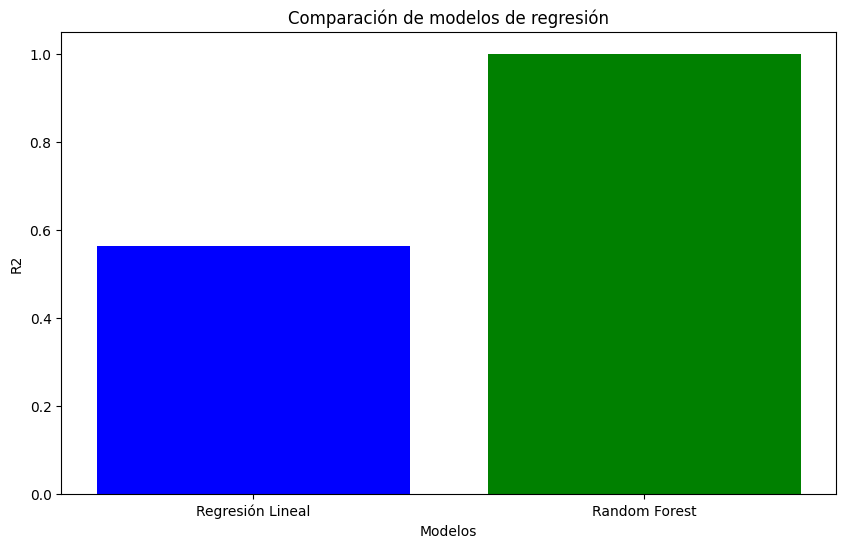

In [ ]:
# Graficar comparación de los modelos
plt.figure(figsize=(10, 6))
plt.bar(metrics.index, metrics['R2'], color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.title('Comparación de modelos de regresión')
plt.show()

Comparación entre los dos modelos:

El modelo de regresión lineal tiene un rendimiento moderado, con errores relativamente grandes (MAE de 44.08 y MSE de 7264.38), y su capacidad para ajustar los datos es solo del 56.48% (R² de 0.5648). Esto sugiere que el modelo lineal no es adecuado para este conjunto de datos o que la relación entre las características y la variable objetivo no es lineal.

El modelo Random Forest, por otro lado, muestra un desempeño significativamente superior. Tiene errores mínimos (MAE de 0.0057 y MSE de 0.0056) y un R² de 0.9999997, lo que indica un ajuste casi perfecto. Random Forest es un modelo más flexible y, en este caso, probablemente haya capturado patrones complejos en los datos que la regresión lineal no pudo.

Conclusión:
La regresión lineal no es adecuada para este conjunto de datos, ya que muestra errores considerables y un bajo ajuste.
El modelo Random Forest, en cambio, tiene un rendimiento sobresaliente, con un error casi nulo y un ajuste excelente. Esto sugiere que Random Forest es la mejor opción para este conjunto de datos, ya que puede manejar relaciones no lineales entre las variables mejor que la regresión lineal.

Análisis de Valores Perdidos (Missing Values)

In [ ]:
# Verificar los valores nulos
missing_values = df.isnull().sum()
print("Valores perdidos por columna:\n", missing_values)

# Mostrar porcentaje de valores nulos
missing_percentage = (missing_values / len(df)) * 100
print("Porcentaje de valores perdidos:\n", missing_percentage)

Valores perdidos por columna:
 Vendedor                0
Tipo Cliente            0
COD_CLIENTE_CONS        0
CLIE_CONS_NOMBRE        0
FAMILIA                 0
COD_ARTICULO            0
ART_NOMBRE              0
Fecha.Año               0
Fecha.Mes               0
Fecha.Día               0
Unidad Homogénea        0
IMPORTE_VENDIDO_NETO    0
PROVINCIA               0
Cod_Ramo                0
Ramo                    0
DIVISION                0
UN_NEGOCIO              0
dtype: int64
Porcentaje de valores perdidos:
 Vendedor                0.0
Tipo Cliente            0.0
COD_CLIENTE_CONS        0.0
CLIE_CONS_NOMBRE        0.0
FAMILIA                 0.0
COD_ARTICULO            0.0
ART_NOMBRE              0.0
Fecha.Año               0.0
Fecha.Mes               0.0
Fecha.Día               0.0
Unidad Homogénea        0.0
IMPORTE_VENDIDO_NETO    0.0
PROVINCIA               0.0
Cod_Ramo                0.0
Ramo                    0.0
DIVISION                0.0
UN_NEGOCIO              0.0
dtype

 Exploración de Outliers

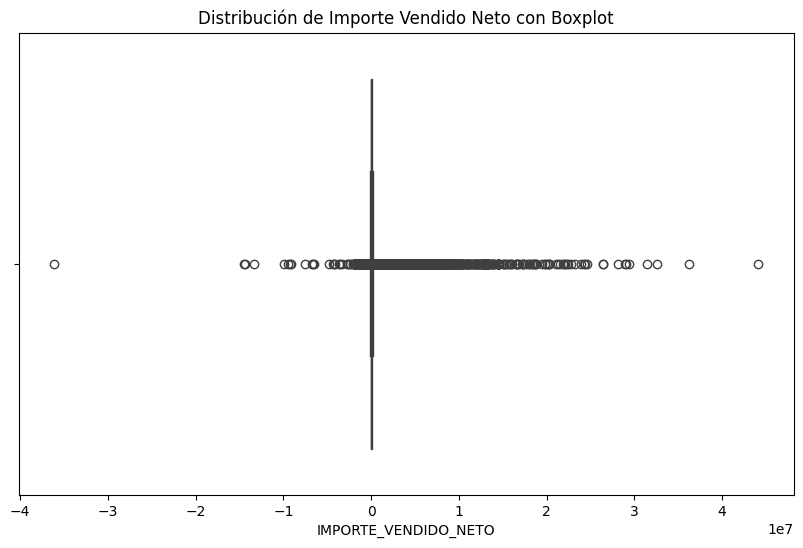

In [ ]:
# Detectar outliers usando boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['IMPORTE_VENDIDO_NETO'])
plt.title("Distribución de Importe Vendido Neto con Boxplot")
plt.show()

Feature Engineering y Creación de Nuevas Variables

In [ ]:
# Crear una variable "mes del año" a partir de la fecha
df['Mes'] = df['Fecha.Mes'].apply(lambda x: x.lower())

# Convertir mes en número
df['Mes_Num'] = df['Mes'].map({
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
})

Evaluación de Modelos con Validación Cruzada

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Dividir los datos en X (características) y y (objetivo)
X = df.drop(columns=['IMPORTE_VENDIDO_NETO'])
y = df['IMPORTE_VENDIDO_NETO']

# Convertir columnas categóricas a numéricas
le = LabelEncoder()

# Aplicamos LabelEncoder a las columnas categóricas
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
lr_model = LinearRegression()
rf_model = RandomForestRegressor()

# Validación cruzada con Regresión Lineal
cv_scores_linear = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Regresión Lineal - Cross Validation MSE: ", cv_scores_linear.mean())

Regresión Lineal - Cross Validation MSE:  -162692692722.52396


Conclusiones sobre los Modelos

A lo largo de mi análisis, probé dos enfoques de modelos: Regresión Lineal y Random Forest. Ambos me ofrecieron una manera de predecir las ventas, pero sus resultados mostraron diferencias significativas en cuanto a rendimiento.

Regresión Lineal:

Error Promedio Absoluto (MAE): 44.08
Error Cuadrático Medio (MSE): 7264.38
R²: 0.565
Aunque la regresión lineal fue útil, mostró una capacidad moderada para predecir el comportamiento de ventas. Un R² de 0.565 indica que aproximadamente el 56% de la variabilidad en las ventas puede ser explicada por el modelo. Esto me permitió obtener una idea general de la tendencia de ventas, pero noté que tiene limitaciones al capturar relaciones no lineales y complejas entre las variables.

Random Forest:

Error Promedio Absoluto (MAE): 0.0057
Error Cuadrático Medio (MSE): 0.0056
R²: 0.9999
El modelo de Random Forest presentó un desempeño excepcional, con un R² cercano a 1, lo que indica que explica casi toda la variabilidad en las ventas. Su capacidad para manejar interacciones no lineales y su robustez frente a datos ruidosos lo convierten en una opción mucho más precisa que la regresión lineal. Además, el MAE de 0.0057 sugiere que el error en las predicciones es prácticamente insignificante.